### Download and Import libraries:
Dowload and import the following libraries: **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**.


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [134]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [136]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")  # replace spaces with "0"
df["TotalCharges"] = df["TotalCharges"].astype(float)     # convert to float
df.info()  #Check the changed data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [137]:
df.isnull().sum().sum() # Check if any null value is present

0

In [138]:
df.describe() # Check the descriptive analysis

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [139]:
df.duplicated().sum() # check any duplicate value
df["customerID"].duplicated().sum() # check any duplicate value with Unique Value

0

In [140]:
#Convert 0 and 1 to yes and no in SeniorCitizen

def convert(Value):
    if Value == 1:
        return "Yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)  # Change the data type int to string which mean Object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Analysis: 
In the section above, we cleaned the data, checked the data types, identified null values, and looked for duplicate entries.

Text(0.5, 1.0, 'Count of Customers by Churn')

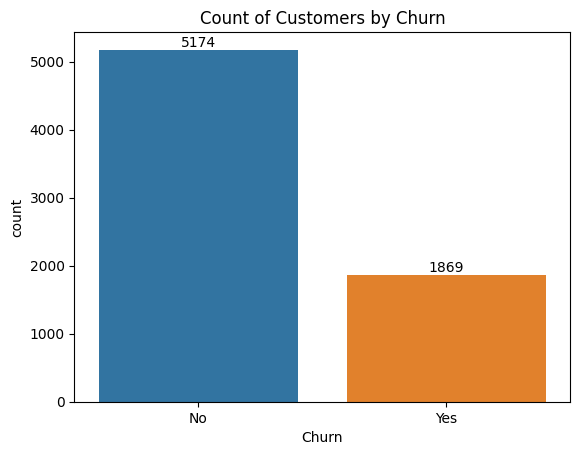

In [141]:
# Create countplot through seaborn library to check the Count of Customers by Churn.

ax = sbn.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")

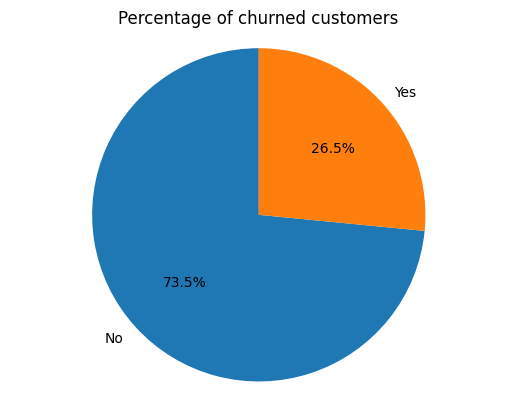

In [142]:
# Create PieChart through matplotlib library to check the Percentage of churned customers. 

# Count values in 'Churn' column
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of churned customers")
plt.axis('equal')  # Keeps the pie chart circular
plt.show()


### Analysis: 
In the section above, both the pie chart and bar chart show that 26.54% of our customers have churned.

Text(0.5, 1.0, 'Churn by gender')

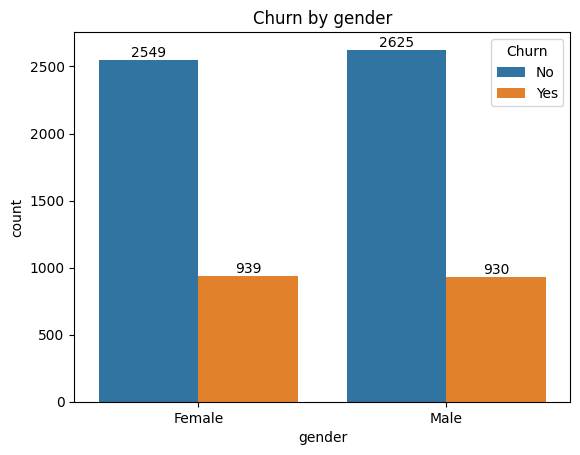

In [143]:
# Create countplot through seaborn library to check the Churn by gender.

ax = sbn.countplot(x = 'gender', data = df, hue= "Churn")
# ax.bar_label(ax.containers[0]) # for single labels
for container in ax.containers: # for multiple labels
    ax.bar_label(container)

plt.title("Churn by gender")

Text(0.5, 1.0, 'Count of Senior Citizens')

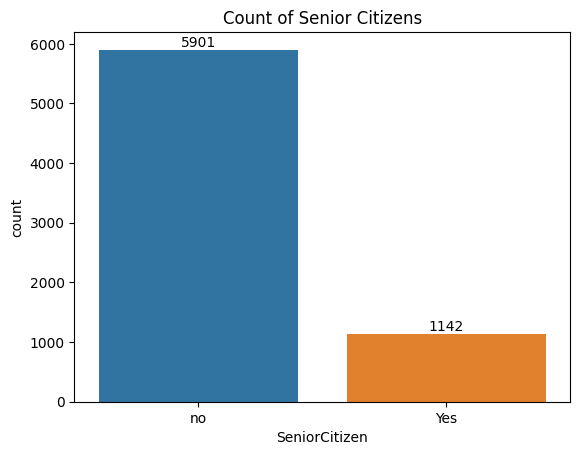

In [144]:
# Create countplot through seaborn library to check the Count of Senior Citizens.

ax = sbn.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Senior Citizens")

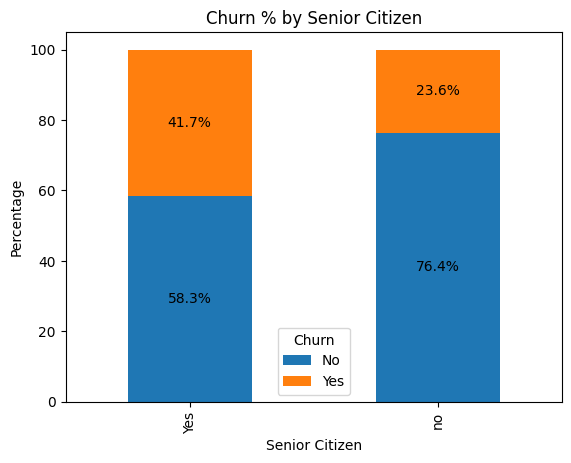

In [145]:
# Create countplot through seaborn library to check the Churn % by Senior Citizen.

# Crosstab counts of SeniorCitizen vs Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert counts to percentages per SeniorCitizen group (rows)
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_perc.plot(kind='bar', stacked=True)

# Add % labels inside bars
for i, (idx, row) in enumerate(ct_perc.iterrows()):
    cum = 0
    for val in row:
        if val > 0:
            ax.text(i, cum + val/2, f'{val:.1f}%', ha='center', va='center', color='black')
        cum += val

plt.title("Churn % by Senior Citizen")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title='Churn')
plt.show()

### Analysis: 
In the section above, a greater percentage of customers in the Senior Citizen category have churned compared to non-senior customers.

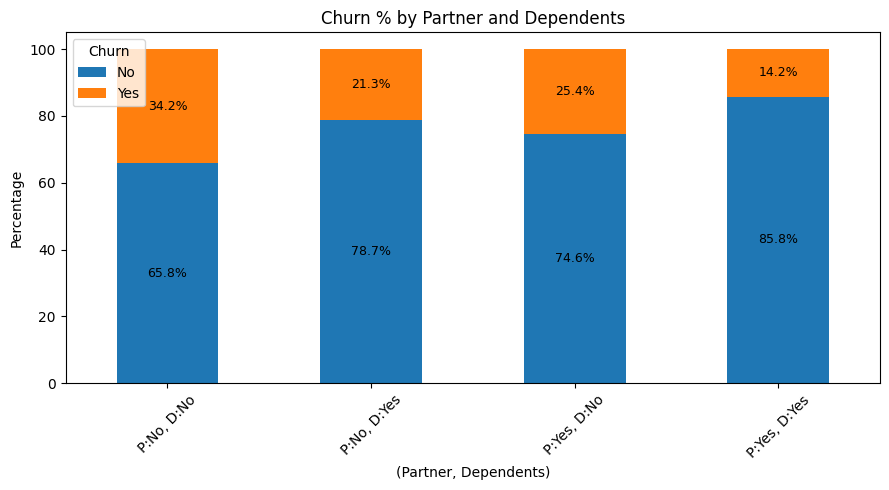

In [146]:
# Create countplot through seaborn library to check the Churn % by Partner and Dependents.

# Crosstab counts of Partner & Dependents grouped by Churn
ct = pd.crosstab(index=[df['Partner'], df['Dependents']], columns=df['Churn'])

# Convert counts to percentages per (Partner, Dependents) group
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_perc.plot(kind='bar', stacked=True, figsize=(9, 5))
ax.set_xticklabels([f'P:{p}, D:{d}' for p, d in ct_perc.index], rotation=45)

# Add % labels inside bars
for i, (idx, row) in enumerate(ct_perc.iterrows()):
    cum = 0
    for val in row:
        if val > 0:
            ax.text(i, cum + val/2, f'{val:.1f}%', ha='center', va='center', color='black', fontsize=9)
        cum += val

plt.title("Churn % by Partner and Dependents")
plt.ylabel("Percentage")
plt.xlabel("(Partner, Dependents)")
plt.legend(title='Churn', loc='upper left')
plt.tight_layout()
plt.show()


### Analysis: 
In the above section, customers with both a partner and dependents are the least likely to churn, whereas those with neither show the highest churn rates. This suggests that family support may play a significant role in customer retention becasue customers without family support are more likely to churn.

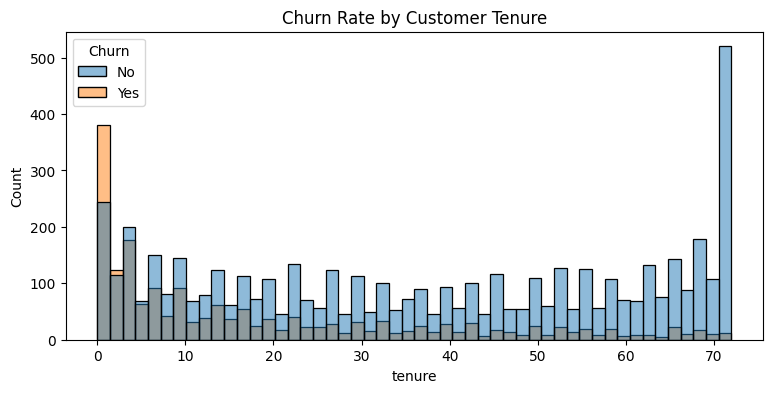

In [147]:
# Create histogram by seaborn library to see Churn Rate by Customer Tenure

plt.figure(figsize=(9,4))
sbn.histplot(x = "tenure", data = df, bins = 50, hue= "Churn")
plt.title("Churn Rate by Customer Tenure")
plt.show()

### Analysis: 
Customers who have been with us for a longer period are more likely to stay, while those with a tenure of 1–2 months tend to churn more.

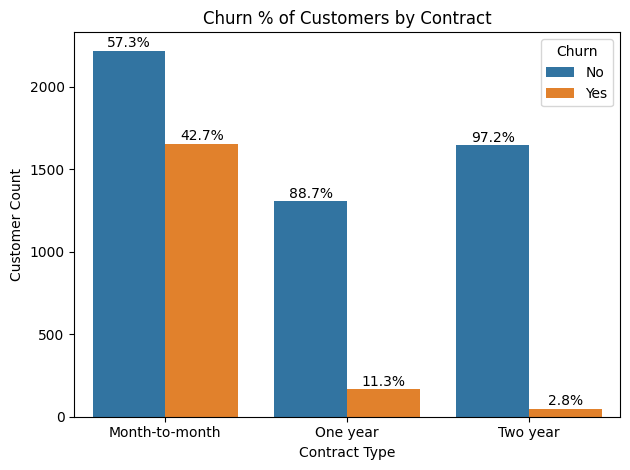

In [162]:
# Create countplot through seaborn library to check the Churn Percentage of Customers by Contract.

# Countplot grouped by 'Contract' and hue='Churn'
ax = sbn.countplot(x='Contract', data=df, hue='Churn')

# Calculate total per contract group
total_per_contract = df.groupby('Contract').size()

# Add percentage labels to each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        contract = bar.get_x() + bar.get_width() / 2
        contract_type = bar.get_label()  # gets the index of container
        contract_group = bar.get_x()  # bar's x position
        # Get the corresponding x-tick label (Contract type)
        xtick = ax.get_xticks()
        contract_index = int(round(bar.get_x() + bar.get_width()/2))
        contract_label = ax.get_xticklabels()[contract_index].get_text()
        total = total_per_contract[contract_label]
        percentage = height / total * 100
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2,
                f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Chart title and labels
plt.title("Churn % of Customers by Contract")
plt.ylabel("Customer Count")
plt.xlabel("Contract Type")
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### Analysis: 
Customers on month-to-month contracts are more likely to churn compared to those on one or two year contracts.


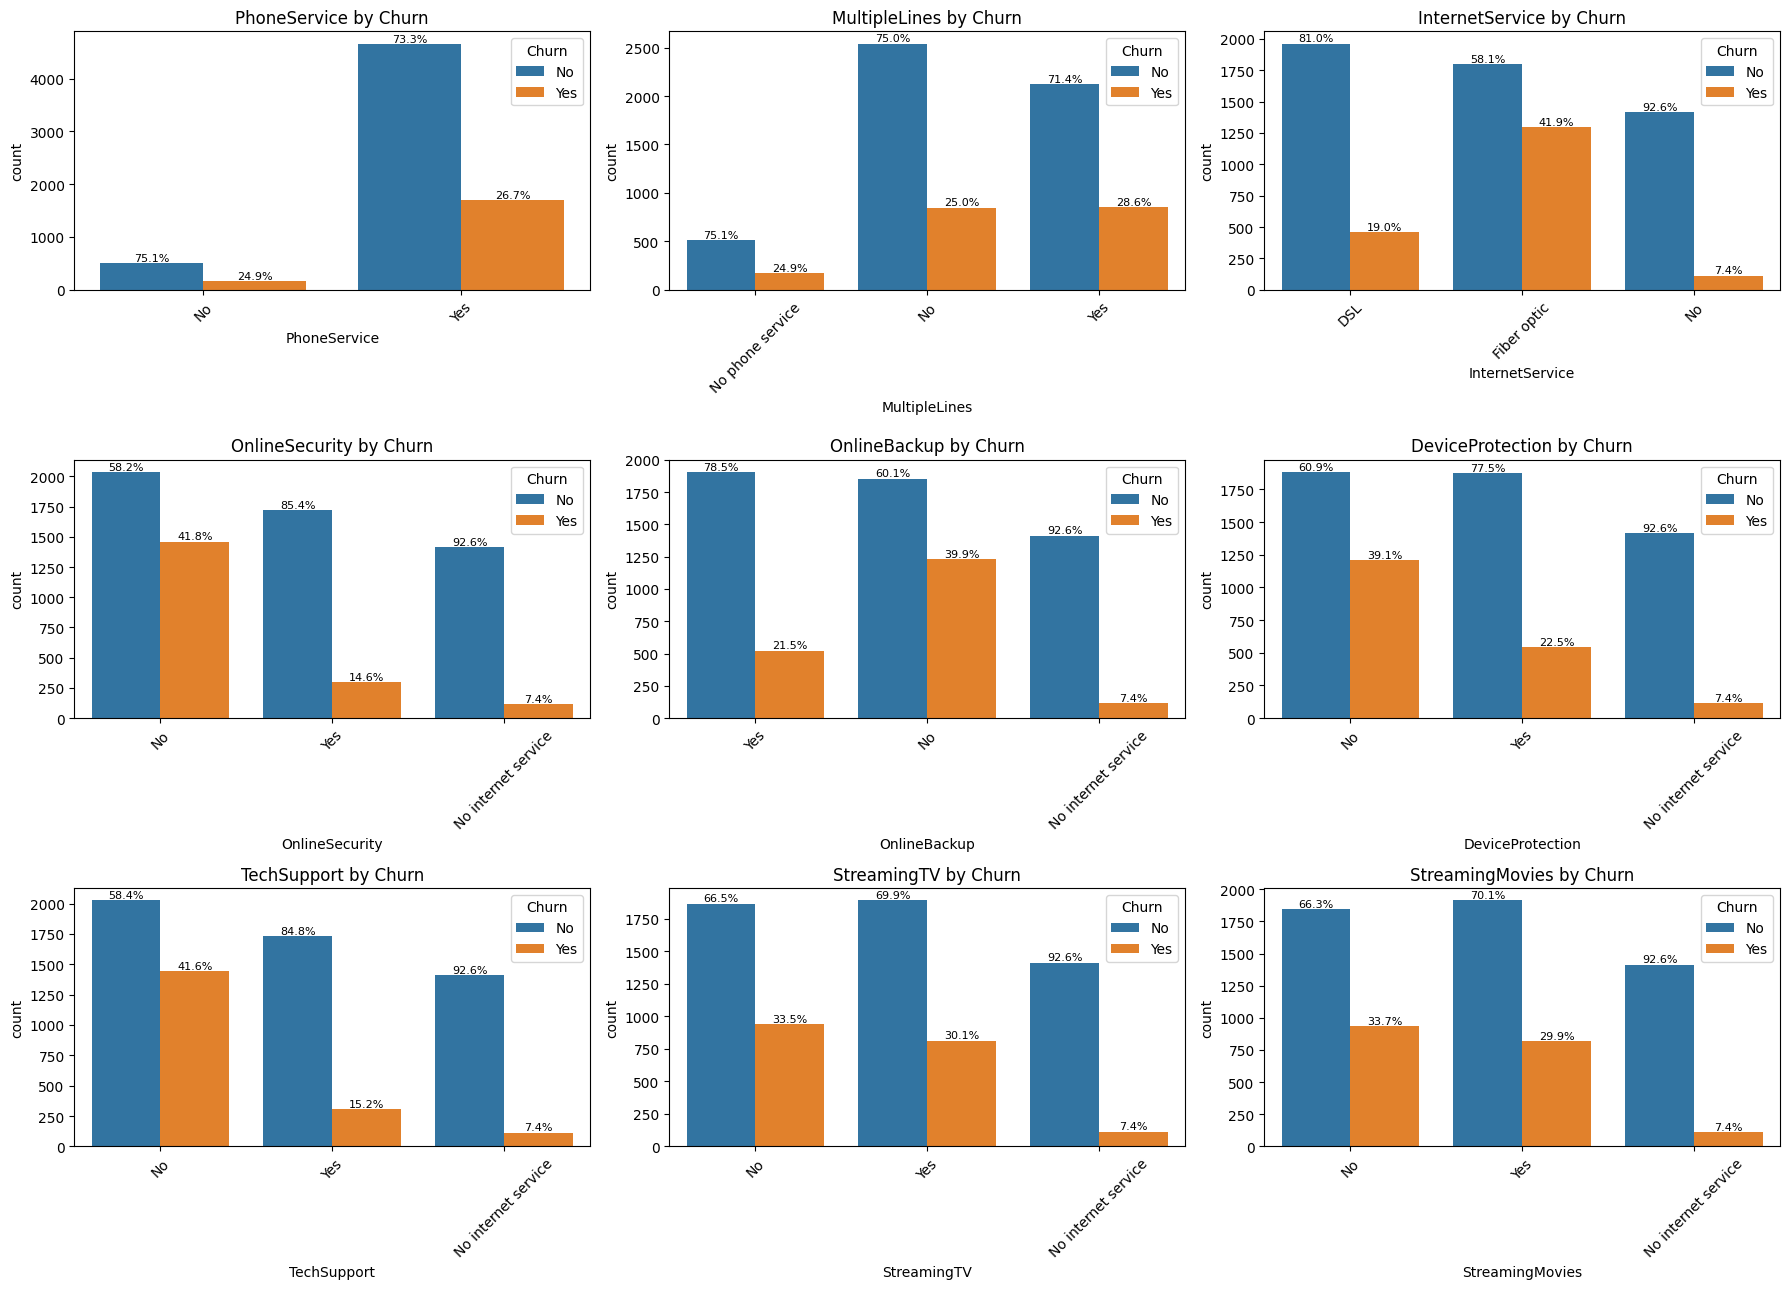

In [149]:
# Create subplot of service countplot through seaborn, matplotlib library to check different services effects by Churn.

cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 13))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = sbn.countplot(data=df, x=col, hue='Churn', ax=axes[i])

    # Calculate total per category (e.g. PhoneService: Yes, No)
    total_per_category = df.groupby(col).size()

    # Add % labels above bars
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue
            bar_label = bar.get_x() + bar.get_width() / 2
            category = bar.get_x() + bar.get_width() / 2
            xtick_index = int(round(bar.get_x() + bar.get_width()/2))
            category_label = ax.get_xticklabels()[xtick_index].get_text()
            total = total_per_category.get(category_label, 1)
            perc = (height / total) * 100
            ax.text(bar.get_x() + bar.get_width() / 2, height + 2,
                    f'{perc:.1f}%', ha='center', va='bottom', fontsize=8)

    ax.set_title(f'{col} by Churn')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Analysis: 

Customers without internet-related services (e.g. **OnlineSecurity**, **TechSupport**) or on **basic plans** are more likely to churn. Churn is significantly **lower** among those with active **support and protection services**, showing service engagement helps retain customers. 

This suggests that customers who are more engaged with the company's offerings are more likely to stay, highlighting the importance of promoting **value-added services** for customer retention.

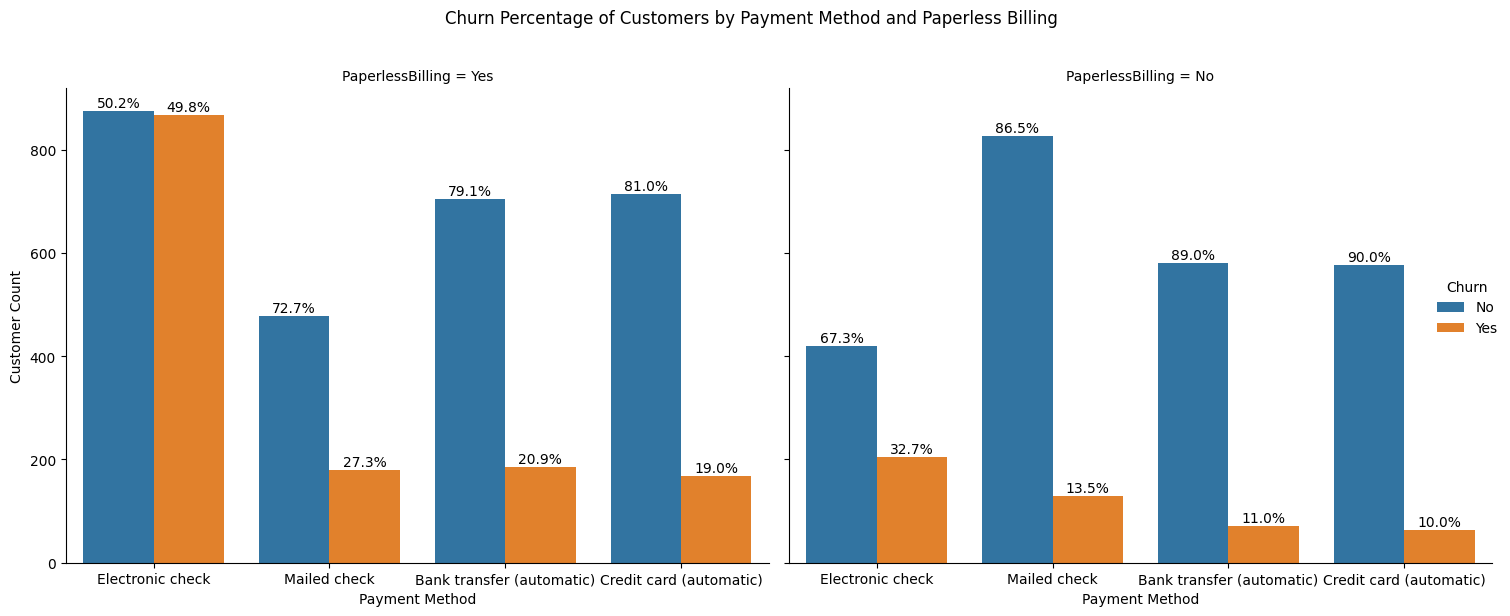

In [151]:
import matplotlib.pyplot as plt
import seaborn as sbn

# Create countplot grouped by PaymentMethod, hue=Churn, and facet by PaperlessBilling
g = sbn.catplot(
    x='PaymentMethod', 
    hue='Churn', 
    col='PaperlessBilling',
    data=df, 
    kind='count', 
    height=6, 
    aspect=1.2
)

# Add percentage labels on each bar for each subplot
for ax in g.axes.flat:
    # Get PaperlessBilling value for this subplot
    paperless = ax.get_title().split(' = ')[1]

    # Filter data for this PaperlessBilling value
    sub_df = df[df['PaperlessBilling'] == paperless]

    # Calculate totals per PaymentMethod within this PaperlessBilling group
    total_per_payment = sub_df.groupby('PaymentMethod').size()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            # x position of bar center
            x_pos = bar.get_x() + bar.get_width() / 2
            
            # get x-tick label nearest to bar center
            contract_index = int(round(x_pos))
            contract_label = ax.get_xticklabels()[contract_index].get_text()
            
            total = total_per_payment[contract_label]
            percentage = height / total * 100 if total > 0 else 0
            ax.text(x_pos, height + 2, f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Chart titles and labels
g.fig.suptitle("Churn Percentage of Customers by Payment Method and Paperless Billing", y=1.02)
g.set_axis_labels("Payment Method", "Customer Count")
g._legend.set_title('Churn')

plt.tight_layout()
plt.show()


### Analysis: 
Customers with **paperless** billing have significantly **higher churn rates** across all payment methods, with **electronic check** users showing the **highest churn**. Customers using **mailed checks** have the **lowest churn rates**. This suggests that paperless billing correlates with increased customer churn regardless of payment method.

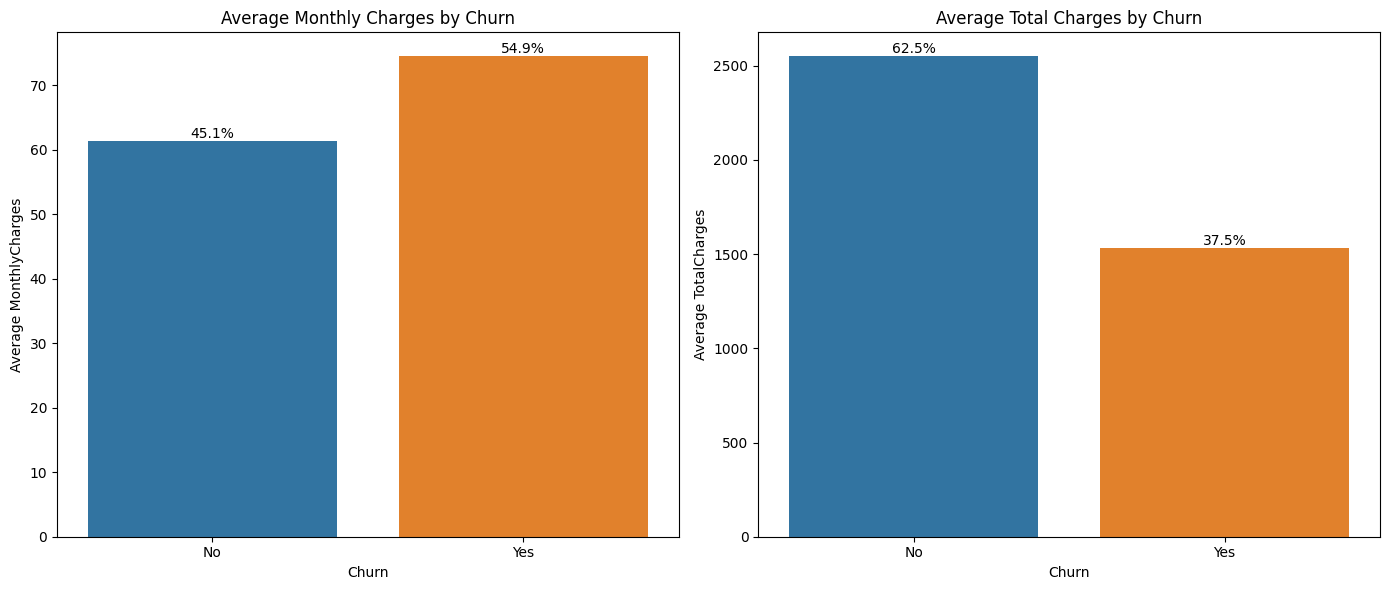

In [161]:
# Using matplotlib.pyplo,seaborn library to see Average MonthlyCharges by Churn and Average TotalCharges by Churn.

import matplotlib.pyplot as plt
import seaborn as sbn

# Calculate averages by Churn
avg_charges = df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean().reset_index()

# Calculate total average for each charge to get percentage basis
total_avg_monthly = avg_charges['MonthlyCharges'].sum()
total_avg_total = avg_charges['TotalCharges'].sum()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MonthlyCharges barplot
sbn.barplot(x='Churn', y='MonthlyCharges', data=avg_charges, ax=ax[0])
ax[0].set_title('Average Monthly Charges by Churn')
ax[0].set_ylabel('Average MonthlyCharges')

# Add percentage labels on bars for MonthlyCharges
for p in ax[0].patches:
    height = p.get_height()
    percent = (height / total_avg_monthly) * 100
    ax[0].annotate(f'{percent:.1f}%', 
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', fontsize=10)

# TotalCharges barplot
sbn.barplot(x='Churn', y='TotalCharges', data=avg_charges, ax=ax[1])
ax[1].set_title('Average Total Charges by Churn')
ax[1].set_ylabel('Average TotalCharges')

# Add percentage labels on bars for TotalCharges
for p in ax[1].patches:
    height = p.get_height()
    percent = (height / total_avg_total) * 100
    ax[1].annotate(f'{percent:.1f}%', 
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




### Analysis: 
Customers who churned tend to have **higher monthly charges** but significantly **lower total charges** compared to those who stayed. This suggests that **higher monthly fees** may drive customer attrition, with price-sensitive customers leaving early before accumulating substantial lifetime value with the company.

## Conclusion:
Our churn analysis reveals that about **26.54%** of customers have left the service. Senior citizens show a **higher tendency** to churn compared to younger customers. Family support plays a key role in retention, as customers with **partners and dependents** churn less. Newer customers with shorter tenures, especially those on **month-to-month contracts**, are more likely to leave early. Engagement with **value-added internet services** such as online security and tech support significantly **reduces churn**, highlighting the importance of service offerings. Additionally, customers using **paperless billing**, particularly those paying via **lectronic check**, exhibit **igher churn rates**. Finally, churned customers tend to have **higher monthly charges** but lower total charges, indicating that **higher monthly costs** may push price-sensitive customers away before they accumulate long-term value.